<a href="https://colab.research.google.com/github/victorviro/Deep_learning_python/blob/master/Introduction_to_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks explained and example with Keras

* **1. Introduction convolutional neural networks(CNNs)**
    * 1.1 Arquitecture of the visual cortex
    * 1.2 Convolutional layers
    * 1.3 Pooling layer
    * 1.4 CNN arquitectures
     
    
* **2. Example**
    * 2.1 Load data
    * 2.2 Data preproccesing
    * 2.3 Building CNN architecture using keras sequential API
    * 2.4 Train the model
    * 2.5 Model evaluation

# 1 Introduction convolutional neural networks

Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s.

In the last few years, thanks to the increase in computational power, the amount of available training data, and the study of deep nets, CNNs have achieved superhuman performance on some complex visual tasks like image search services, self-driving cars, and more.


## 1.1 Arquitecture of the visual cortex



A researcher performed experiments on cats in 1959, giving insights on the structure of the visual cortex. He noticed that many neurons in the visual cortex have a small local receptive field, meaning they react only to visual stimuli located in a limited region of the visual field(see Figure).


The authors showed that some neurons react only to images of horizontal lines, while others react only to lines with different orientations (two neurons may have the same receptive field but react to different line orientations). They also noticed that some neurons have larger receptive fields, and they react to more complex patterns that are combinations of the lower-level patterns. These observations led to the idea that the higher-level neurons are based on the outputs of neighboring lower-level neurons (notice that each neuron is connected only to a few neurons from the previous layer). This powerful architecture is able to detect all sorts of complex patterns in any area of the visual field.

![](https://i.ibb.co/jvphv3k/Captura.png)


Observation: We do not use a regular deep neural network with fully connected layers for image recognition. Despite it works fine for small images, it breaks for larger images because of the huge number of parameters it requires.


## 1.2 Convolutional layers


The most important building block of a CNN is the *convolutional layer*: neurons in the first convolutional layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields (see Figure 14-2). In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer. This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.

![](https://i.ibb.co/QPBKL3M/Captura2.png)

A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h – 1$, columns $j$ to $j + f_w – 1$, where $f_h$ and $f_w$ are the height and width of the receptive field (see Figure 14-3). In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram. This is called *SAME padding* or *Zero padding*.

![](https://i.ibb.co/WyhzNYG/Captura3.png)


It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive fields, as shown in Figure 14-4.

![](https://i.ibb.co/ZLWjXPD/Captura4.png)

The shift from one receptive field to the next is called the *stride*. In the diagram, a $5 \times 7$ input layer (plus zero padding) is connected to a $3\times4$ layer, using $3\times3$ receptive fields and a stride of 2 (in this example the stride is the same in both directions, but it does not have to be so). A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i\times s_h$ to $i\times s_h+f_h-1$, columns $j \times s_w$ to $j \times s_w + f_w -1$, where $s_h$ and $s_w$ are the vertical and horizontal strides.



### Filters

A neuron’s weights can be represented as a small image the size of the receptive field. For example, Figure 14-5 shows two possible sets of weights, called filters (or convolution kernels). The first one is represented as a black square with a vertical white line in the middle (it is a $7 \times 7$ matrix full of 0s except for the central column, which is full of 1s); neurons using these weights will ignore everything in their receptive field except for the central vertical line (since all inputs will get multiplied by 0, except for the ones located in the central vertical line). The second filter is a black square with a horizontal white line in the middle. Once again, neurons using these weights will ignore everything in their receptive field except for the central horizontal line.

Now if all neurons in a layer use the same vertical line filter (and the same bias term), and you feed the network the input image shown in Figure 14-5 (bottom image), the layer will output the top-left image. Similarly, the upper-right image is what you get if all neurons use the same horizontal line filter. A layer full of neurons using the same filter outputs a feature map, which highlights the areas in an image that activate the filter the most. Of course you do not have to define the filters manually: instead, during training the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns.

**Note**: It is usually choosing odd numbers to define the size of the filters.
![](https://i.ibb.co/HnD2Mth/Captura5.png)

 



Applying a convolution to an image is like running a filter of a certain dimension and sliding it on top of the image. That operation is translated into an element-wise multiplication between the two matrices and finally an addition of the multiplication outputs. The final integer of this computation forms a single element of the output matrix.

Let’s review this via an example, where we want to apply a filter (kernel) to detect vertical edges from a 2D original image.

![texto alternativo](https://i.ibb.co/P6cLRPt/conv.png)

In the above example, I used a value of a stride equal to 1, meaning the filter moves horizontally and vertically by one pixel. The values of the filter were already decided in the convolution. The goal of a convolutional neural network is to learn these numbers. We treat them as parameters, which the network learns using backpropagation.

### Multiple feature maps



Up to now, for simplicity, I have represented the output of each convolutional layer as a thin 2D layer, but in reality a convolutional layer has multiple filters (you decide how many), and it outputs one feature map per filter, so it is more accurately represented in 3D (see Figure 14-6). To do so, it has one neuron per pixel in each feature map, and all neurons within a given feature map share the same parameters (i.e., the same weights and bias term). However, neurons in different feature maps use different parameters.

In short, a convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs.

Observations:
- The fact that all neurons in a feature map share the same parameters dramatically reduces the number of parameters in the model. Moreover, once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location. In contrast, once a regular DNN has learned to recognize a pattern in one location, it can recognize it only in that particular location.

- Input images are also composed of multiple sublayers, the number of channels: one per color channel. There are typically three: red, green, and blue (RGB).

![](https://i.ibb.co/LQLtqxC/Captura6.png)


Specifically, a neuron located in row $i$, column $j$ of the feature map $k$ in a given convolutional layer $l$ is connected to the outputs of the neurons in the previous layer $l-1$, located in rows $i\times s_h$ to $i\times s_h+f_h-1$ and columns $j \times s_w$ to $j \times s_w + f_w -1$, across all feature maps (in layer $l-1$). Note that all neurons located in the same row $i$ and column $j$ but in different feature maps are connected to the outputs of the exact same
neurons in the previous layer.



We can introduce the formula to quickly calculate the output size. If $l$ is a convolutional layer, we denote the stride by $s_h^{[l]}$, $s_w^{[l]}$; the size of the filter (kernel) by $f_h^{[l]}$, $f_w^{[l]}$; and the padding by $p^{[l]}$. The input of this layer $l$ is going to be some dimension, $n_h^{[l-1]} \times\ n_w^{[l-1]} \times n_c^{[l-1]}$ (this is the output of the previous layer $l-1$, for example, if $l$ is the first hidden layer, the input of layer $l$ will be the images with shape [height of the images $\times$ width of the images $\times$ number of channels]). The output of the layer $l$ will be also a volume with dimension $n_h^{[l]} \times\ n_w^{[l]} \times n_c^{[l]}$ where 
$n_h^{[l]}=\frac{n_h^{[l-1]}+2p^{[l]}-f_h^{[l]}}{s_h^{[l]}}+1$, 
$n_w^{[l]}=\frac{n_w^{[l-1]}+2p^{[l]}-f_w^{[l]}}{s_w^{[l]}}+1$ and 
$n_c^{[l]}$ will be equal to the number of filters used in the convolutional layer. Note that the dimension of each filter in the layer $l$ will be $f_h^{[l]} \times\ f_w^{[l]} \times n_c^{[l-1]}$.



For example, suposse the input images have size $n_h^{[0]} \times\ n_w^{[0]} \times n_c^{[0]}=39 \times\ 39 \times3$ and we apply in the first hidden layer a convolutional layer with stride $s_h^{[1]}=s_w^{[1]}=1$, size filter (kernel) $f_h^{[1]}=f_w^{[1]}=3$, padding $p^{[1]}=0$ and we use $10$ filters, then the output volume of this layer will have the dimension $n_h^{[1]} \times\ n_w^{[1]} \times n_c^{[1]}=
\frac{n_h^{[0]}+2p^{[1]}-f_h^{[1]}}{s_h^{[1]}}+1 \times
\frac{n_w^{[0]}+2p^{[1]}-f_w^{[1]}}{s_w^{[1]}}+1 \times n_c^{[1]}=
\frac{39+0-3}{1}+1 \times
\frac{39+0-3}{1}+1 \times 10 = 37 \times 37 \times 10$, and each of the $10$ filters will have dimension $f_h^{[1]} \times\ f_w^{[1]} \times n_c^{[0]}= 3 \times 3 \times 3$.

Another example is shown in the next figure (only one filter is applied):

![texto alternativo](https://i.ibb.co/VMsq2yb/dim-conv.png)

Another example using 2 filters:

![texto alternativo](https://i.ibb.co/wh7RGgQ/dim-conv2.png)




The final step that takes us to a convolutional neural layer is to add the bias and a non-linear function.

![texto alternativo](https://i.ibb.co/ZhnzLPp/conv-layer.png)

Remember that the parameters involved in one layer are independent of the input size image.

So let’s consider, for example, that we have 10 filters that are of size 3$\times$3$\times$3 in one layer of a neural network. Each filter has 27 (3$\times$3$\times$3) + 1 bias => 28 parameters. Therefore, the total amount of parameters in the layer is 280 (10$\times$28).

We are now ready to build a complete deep convolutional neural network.
The following architecture depicts a simple example of that:

![texto alternativo](https://i.ibb.co/WFDtffF/deep-cnn.png)

**Note**: Reggard to the padding, there are two common choices:
- Valid padding: means no padding.
- SAME padding: the padding is chosen in such way that the output size is the same as the input size.

### Memory



Convolutional layers require a huge amount of RAM. This is especially true during training, because the reverse pass of backpropagation requires all the intermediate values computed during the forward pass.

During inference (i.e., when making a prediction for a new instance) the RAM occupied by one layer can be released as soon as the next layer has been computed, so you only need as much RAM as required by two consecutive layers. But during training everything computed during the forward pass needs to be preserved for the reverse pass, so the amount of RAM needed is (at least) the total amount of RAM required by all layers. 

If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you could distribute the CNN across multiple devices.

### TensorFlow implementation

In TensorFlow, each input image is typically represented as a 3D tensor of shape [`height, width, channels`] . A mini-batch is represented as a 4D tensor of shape [`mini-batch size, height, width, channels`].

The next code creates a Conv2D layer with $32$ filters, each $3\times3$, using a stride of $1$ (both horizontally and vertically), SAME padding, and applying the ReLU activation function to its outputs.

In [ ]:
from keras.layers import Conv2D
conv = Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

As you can see, convolutional layers have quite a few hyperparameters: you must choose the number of filters, their height and width, the strides, and
the padding type. As always, you can use cross-validation to find the right hyperparameter values, but this is very time-consuming. We will discuss common CNN architectures here, to give you some idea of what hyperparameter values work best in practice.

## 1.3 Pooling layer



The  pooling layers are the second common building block of CNNs. Their goal is to *subsample*  (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting).

Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer (within a small rectangular receptive field). You must define its size, the stride, and the padding type, just like before (the formulas to compute the output size of a convolutional layer also work). However, a pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.  Figure 14-8 shows a max pooling layer, which is the most common type of pooling layer.

![](https://i.ibb.co/rFL9w3v/Captura8.png)

In this example, we use a $2\times2$ pooling kernel, with a stride of 2, and no padding. Only the max input value in each receptive field makes it to the next layer, while the other inputs are dropped. For example, in the lower left receptive field in  Figure 14-8, the input values are 1, 5, 3, 2, so only the max value, 5, is propagated to the next layer. Because of the stride of 2, the output image has half the height and half the width of the input image.

A pooling layer typically works on every input channel independently, so the output depth is the same as the input depth.


A max pooling layer also introduces some level of  **invariance**  to small translations, as shown in  Figure 14-9. Here we assume that the bright pixels have a lower value than dark pixels, and we consider 3 images (A, B, C) going through a max pooling layer with a 2 × 2 kernel and stride 2. Images B and C are the same as image A, but shifted by one and two pixels to the right. As you can see, the outputs of the max pooling layer for images A and B are identical. This is what translation invariance means. However, for image C, the output is different: it is shifted by one pixel to the right (but there is still 75% invariance).  Such invariance (even if it is limited) can be useful in cases where the prediction should not depend on these details, such as in classification tasks.


![](https://i.ibb.co/P5vN9vD/Captura9.png)

But max pooling has some downsides: firstly, it is very destructive: even with a tiny 2 × 2 kernel and a stride of 2, the output will be two times smaller in both directions (so its area will be four times smaller), simply dropping 75% of the input values. And in some applications, invariance is not desirable, for example for  semantic segmentation: the task of classifying each pixel in an image depending on the object that pixel belongs to: obviously, if the input image is translated by 1 pixel to the right, the output should also be translated by 1 pixel to the right. The goal in this case is equivariance, not invariance: a small change to the inputs should lead to a corresponding small change in the output.

We can see the application of pooling layers in the following example of a Convolutional Neural Network. This network is inspired by the LeNet-5 network:

![texto alternativo](https://i.ibb.co/D5KkZcm/deep-cnn2.png)

#### TensorFlow implementation

Implementing a max pooling layer in TensorFlow is quite easy. The following code creates a max pooling layer using a $2\times2$ kernel. The strides default to the kernel size, so this layer will use a stride of $2$ (both horizontally and vertically). By default, it uses VALID padding (i.e., no padding at all):

In [ ]:
from keras.layers import MaxPool2D
max_pool = MaxPool2D(pool_size=2)

To create an average pooling layer, just use `AvgPool2D` instead of `MaxPool2D`. As you might expect, it works exactly like a max pooling layer, except it computes the mean rather than the max. Average pooling layers used to be very popular, but people mostly use max pooling layers now, as they generally perform better. This may seem surprising, since computing the mean generally loses less information than computing the max. But on the other hand, max pooling preserves only the strongest feature, getting rid of all the meaningless ones, so the next layers get a cleaner signal to work
with. Moreover, max pooling offers stronger translation invariance than average pooling.


Note that max pooling and average pooling can be performed along the depth dimension rather than the spatial dimensions (height and width), although this is not as common. This can allow the CNN to learn to be invariant to various features. For example, it could learn multiple filters, each detecting a different rotation of the same pattern, such as handwritten digits (see Figure 14-10), and the depth-wise max pooling layer would ensure that the output is the same regardless of the rotation. The CNN could similarly learn to be invariant to anything else: thickness, brightness, skew, color, and so on.

![texto alternativo](https://i.ibb.co/zZkmsHy/deph-wise-max-pool.png)

One last type of pooling layer that you will often see in modern architectures is the *global average pooling* layer. It works very differently: all it does is compute the mean of each entire feature map (it’s like an average pooling layer using a pooling kernel with the same spatial dimensions as the inputs). This means that it just outputs a single number per feature map and per instance. Although this is of course extremely
destructive (most of the information in the feature map is lost), it can be useful as the output layer, as we will see later in this chapter. To create such a layer, simply use the `keras.layers.GlobalAvgPool2D` class:

In [ ]:
from keras.layers import GlobalAvgPool2D
global_avg_pool = GlobalAvgPool2D()

## 1.4 CNN arquitectures



Typical CNN architectures stack a few convolutional layers (each one generally followed by a ReLU layer), then a pooling layer, then another few convolutional layers (+ReLU), then another pooling layer, and so on. The image gets smaller and smaller as it progresses through the network, but it also typically gets deeper and deeper (i.e., with more feature maps) thanks to the convolutional layers (see  Figure 14-11). At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers (+ReLUs), and the final layer outputs the prediction (e.g., a softmax layer that outputs estimated class probabilities).

![](https://i.ibb.co/4P0Vy7n/Captura10.png)

It’s common that, as we go deeper into the network, the sizes ($n_h, n_w$) decrease, while the number of channels ($n_c$) increases.

Over the years, variants of this fundamental architecture have been developed. There are several “classic” networks, such as LeNet, AlexNet, VGG, ...

# 2 Example

In this example, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau

from functools import partial

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.1 Load data

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## 2.2 Data processing

Images have been reshaped from 784 pixel vectors to 28$\times$28 matrices. Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel.

In [ ]:
X_train_full = X_train_full[..., np.newaxis]
print(X_train_full.shape)
X_test = X_test[..., np.newaxis]
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# How many images does dataset have for each digit?
print(pd.Series(y_train_full).value_counts())
print(pd.Series(y_test).value_counts())

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64


### Data transformation

We perform a grayscale normalization to reduce the effect of illumination's differences. 

In [ ]:
# Normalize the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

### Label encoding. Target variable

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : `2` -> `[0,0,1,0,0,0,0,0,0,0]`).

In [ ]:
print(y_train_full[0:5])


[5 0 4 1 9]


In [ ]:
# Encode target variable to one hot vectors
y_train_full = to_categorical(y_train_full, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
print(y_train_full[0:5])
y_train_full.shape

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


(60000, 10)

### Split training and validation data

In [ ]:
# Split the data in traininig and validation sets for the fitting
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.15, random_state=2)

In [ ]:
print(X_train.shape)
print(X_val.shape)

(51000, 28, 28, 1)
(9000, 28, 28, 1)


We can get a better sense for one of these examples by visualising the image and looking at the label.

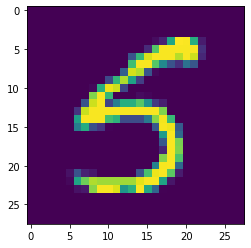

In [ ]:
# Some examples
g = plt.imshow(X_train[2][:,:,0])

## 2.3 Building CNN architecture using keras sequential API


### Define the model

In [ ]:
# CNN architechture is [[Conv2D->relu]*2 -> MaxPool2D]*2 -> Flatten -> Dense -> Dropout -> Out

DefaultConv2D = partial(Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = Sequential([
    DefaultConv2D(filters=32, kernel_size=5, input_shape=[28, 28, 1]),
    DefaultConv2D(filters=32, kernel_size=5),
    MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax'),
])



- In this code, we start by using the `partial()` function to define a thin wrapper around the `Conv2D` class, called `DefaultConv2D`: it simply avoids having to repeat the same hyperparameter values over and over again.

- The first layer uses a large kernel size, but no stride because the input images are not very large. It also sets `input_shape=[28, 28, 1]`, which means the images are 28 $\times$ 28 pixels, with a single color channel (i.e., grayscale).

- Next, we have a max pooling layer, which divides each spatial dimension by a factor of two (since `pool_size=2`).

- Then we repeat the same structure once: two convolutional layers followed by a max pooling layer. For larger images, we could repeat this structure several times (the number of repetitions is a hyperparameter you can tune).


- Note that the number of filters grows as we climb up the CNN towards the output layer (it is initially 32, then 62): it makes sense for it to grow, since the number of low level features is often fairly low (e.g., small circles, horizontal lines, etc.), but there are many different ways to combine them into higher level features. It is a common practice to double the number of filters after each pooling layer: since a pooling layer divides each spatial dimension by a factor of 2, we can afford doubling the number of feature maps in the next layer, without fear of exploding the number of parameters, memory usage, or computational load.

- Next is the fully connected network, composed of 2 hidden dense layers and a dense output layer. Note that we must flatten its inputs, since a dense network expects a 1D array of features for each instance. We also add a dropout layer, with a dropout rate of $50$% each, to reduce overfitting ([Regularization](https://github.com/victorviro/Deep_learning_python/blob/master/Regularization_DNNs.ipynb)).

In [ ]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

### Compiling the model

After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can also specify a list of extra metrics to compute during training and evaluation:

We have one target probability per class for each instance (such as one-hot vectors, e.g. `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent each class), then we need to use the `"categorical_crossentropy"` loss.

Secondly, regarding the optimizer, `"nadam"` simply means that we will train the model using Nadam optimization ([faster optimizers](https://github.com/victorviro/Deep_learning_python/blob/master/Faster_optimizers_DNNs.ipynb)).

Finally, since this is a classifier, it’s useful to measure its `"accuracy"` during training and evaluation.



In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

## 2.4 Train the model

Now the model is ready to be trained. For this we simply need to call its `fit()` method. We pass it the input features (`X_train`) and the target classes (`y_train`), as well as the number of epochs to train. We also pass a validation set (this is optional): Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is useful to see how well the model really performs: if the performance on the training set is much better than on the validation set, your model is probably overfitting the training set.

We implement performance scheduling simply using the `ReduceLROnPlateau` callback ([Learning Rate Scheduling](https://github.com/victorviro/Deep_learning_python/blob/master/Faster_optimizers_DNNs.ipynb)).

In [ ]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.3, min_lr = 0.00001)

In [ ]:
history = model.fit(X_train, y_train, batch_size = 100, epochs = 20,validation_data = (X_val,y_val), callbacks=[reduce_learning_rate])

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 12s 231us/step - loss: 0.1715 - accuracy: 0.9465 - val_loss: 0.0474 - val_accuracy: 0.9847
Epoch 2/20
51000/51000 [==============================] - 10s 200us/step - loss: 0.0552 - accuracy: 0.9839 - val_loss: 0.0309 - val_accuracy: 0.9917
Epoch 3/20
51000/51000 [==============================] - 10s 201us/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.0377 - val_accuracy: 0.9889
Epoch 4/20
51000/51000 [==============================] - 10s 201us/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 5/20
51000/51000 [==============================] - 10s 201us/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0333 - val_accuracy: 0.9912

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
Epoch 6/20
51000/51000 [==============================] - 10s 201us/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0226

If the training set was very skewed or unbalanced (this is not the case), with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument when calling the `fit()` method, giving a larger weight to underrepresented classes, and a lower weight to overrepresented classes.

## 2.5 Model evaluation

The `fit()` method returns a `history` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set.

We plot the learning curves.

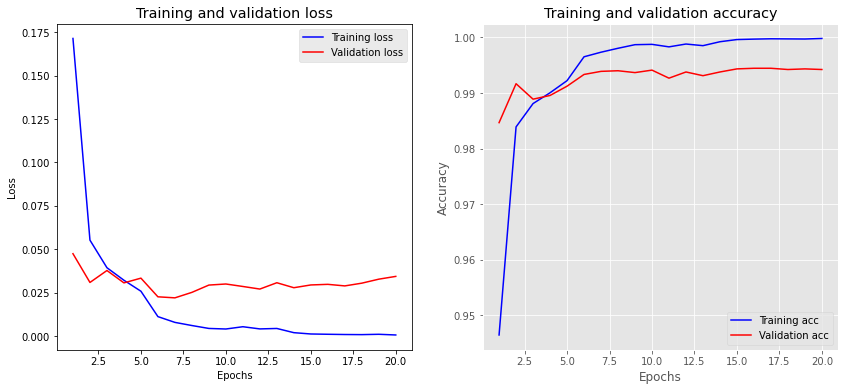

In [ ]:
plt.figure(figsize=(14,6))
# Plot the training loss 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.subplot(121)
plt.style.use("ggplot")
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot the training accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(122)
plt.style.use("ggplot")
plt.plot(epochs, acc, color='blue', label='Training acc')
plt.plot(epochs, val_acc, color='red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.02911870274873964
Validation accuracy: 0.994700014591217


This CNN reaches over 99% accuracy on the test set.

In [ ]:
# Evaluate the network on the test set
print("[INFO] evaluating network...")
predictions = model.predict(X_test)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       1.00      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



The confusion matrix can be very helpful to evaluate the model.
We plot the confusion matrix of the test results.

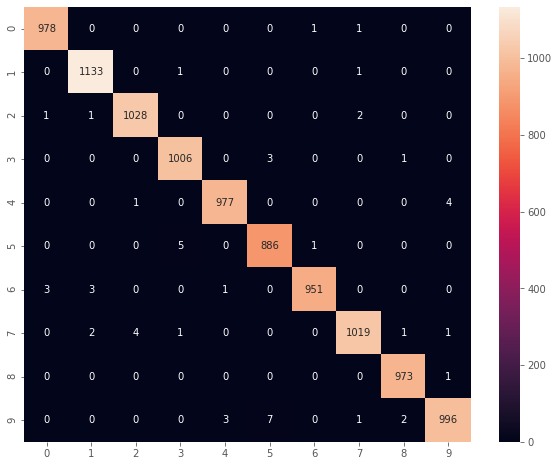

In [ ]:
plt.figure(figsize=(10,8))
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt="d");


# References

- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

- [Course CNN deeplearning.ai.](https://www.youtube.com/watch?v=ArPaAX_PhIs&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF)

- https://github.com/ageron/handson-ml2